   # Insights of Data Scientists Profile


From past couple of years data science and machine learning are the hot topics on social media. And we keep hearing that 
data science is behind recommendation engine to self-driving car and politics to farming and wealth to health and so on.

Now the question is who is behind all these amazing works? The answer is **DATA SCIENTIST** from mathematics and statistics background.

Are you tempted to become data scientists? wait !! before jump in to this field, let’s explore data scientists job satisfaction, salary etc. by answering below questions.

###### Q1. Data Scientists growth over the period 
###### Q2. Gender based data Scientists population
###### Q3. Data Scientists population around the world
###### Q4. Data Scientists popular languages
###### Q5. Data Scientists job satisfaction
###### Q6. Age wise data Scientists average salary 

For this analysis, I am using [Stack Overflow annual developer survey data] (https://insights.stackoverflow.com/survey) from 2016 to 2018. This survey is conducted among software developers of various fields and from across the world.


## Exploring the Data

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Data Loading

In [2]:

# Load stack overflow survey data from 2016 to 2018
survey_data = {}
survey_data['2016'] =pd.read_csv('data/survey_results_public_2016.csv', encoding = 'ISO-8859-1',low_memory=False)
survey_data['2017'] =pd.read_csv('data/survey_results_public_2017.csv', encoding = 'ISO-8859-1',low_memory=False)
survey_data['2018'] =pd.read_csv('data/survey_results_public_2018.csv', encoding = 'ISO-8859-1',low_memory=False)


In [3]:
# Check rows and columns from each year

for i in survey_data:
    print( i + '=> Rows ' +str(survey_data[i].shape[0]) + ' Columns ' + str(survey_data[i].shape[1]) )



2016=> Rows 56030 Columns 66
2017=> Rows 51392 Columns 154
2018=> Rows 98855 Columns 129


In [4]:
# View records from 2016 survey data
pd.set_option('display.max_columns', None)  # Enables to view all columns
survey_data['2016'].head(2)

,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,occupation_group,experience_range,experience_midpoint,salary_range,salary_midpoint,big_mac_index,tech_do,tech_want,aliens,programming_ability,employment_status,industry,company_size_range,team_size_range,women_on_team,remote,job_satisfaction,job_discovery,dev_environment,commit_frequency,hobby,dogs_vs_cats,desktop_os,unit_testing,rep_range,visit_frequency,why_learn_new_tech,education,open_to_new_job,new_job_value,job_search_annoyance,interview_likelihood,how_to_improve_interview_process,star_wars_vs_star_trek,agree_tech,agree_notice,agree_problemsolving,agree_diversity,agree_adblocker,agree_alcohol,agree_loveboss,agree_nightcode,agree_legacy,agree_mars,important_variety,important_control,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
0,1888,Facebook,Afghanistan,Southern Asia,Central Asia,20-24,22.0,Male,Programmer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4637,Facebook,Afghanistan,Southern Asia,Central Asia,30-34,32.0,Male,Developer; Engineer; Programmer,Mobile developer - iOS,"Mobile Dev (Android, iOS, WP & Multi-Platform)",6 - 10 years,8.0,"$40,000 - $50,000",45000.0,NaN,iOS; Objective-C,Swift,Yes,7.0,Employed full-time,Consulting,100-499 employees,15-20 people,3,I rarely work remotely,I love my job,I knew I wanted to work here. I sought out the...,TextMate; Xcode,Multiple times a day,1-2 hours per week,Cats,Mac OS X,No,1,Multiple times a day,To keep my skills up to date,I'm self-taught; On-the-job training; B.S. in ...,I am not interested in new job opportunities,Salary; Ability to make or influence important...,Taking time off work to interview,10%,Show me more live code; Introduce me to the te...,Star Wars,Agree completely,Agree completely,Agree completely,Agree somewhat,Agree completely,Neutral,Agree somewhat,Neutral,Agree somewhat,Disagree somewhat,This is very important,This is very important,This is somewhat important,This is very important,This is very important,I don't care about this,This is somewhat important,This is somewhat important,I don't care about this,I don't care about this,Unrealistic expectations; Interacting with non...,To get help for my job; Because I can't do my ...


In [5]:
# View records from 2017 survey data
survey_data['2017'].head(2)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [6]:
# View records from 2018 survey data
survey_data['2018'].head(2)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelorâs degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"Iâm not actively looking, but I am open to n...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelorâs degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,U

**Check the values of fields required for our analysis**

In [7]:
# Check numer of data scientits from 2018 survey
survey_data['2018'][survey_data['2018']['DevType'].str.contains('Data scientist|achine learning', na=False)].shape

(7088, 129)

In [8]:
# Check gender types
survey_data['2018'].Gender.unique()

array(['Male', nan, 'Female',
       'Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Male',
       'Male;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming', 'Transgender',
       'Female;Transgender',
       'Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Non-binary, genderqueer, or gender non-conforming',
       'Female;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Male;Transgender', 'Female;Male;Transgender',
       'Female;Male;Non-binary, genderqueer, or gender non-conforming',
       'Male;Transgender;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [9]:
# Countries from where developers are working
survey_data['2018'].Country.unique()

array(['Kenya', 'United Kingdom', 'United States', 'South Africa',
       'Nigeria', 'India', 'Spain', 'Croatia', 'Netherlands', 'Israel',
       'Sweden', 'Chile', 'Australia', 'Greece', 'Poland', 'Belgium',
       'Argentina', 'Germany', 'Russian Federation', 'Indonesia',
       'Ireland', 'France', 'Ukraine', 'Denmark', 'Dominican Republic',
       'China', 'Latvia', 'Algeria', 'Colombia', 'Japan', 'Finland',
       'Romania', 'Brazil', 'Bulgaria', 'Iran, Islamic Republic of...',
       'Nepal', 'Bangladesh', 'Pakistan', 'Canada', 'Jordan', 'Portugal',
       'Italy', 'New Zealand', 'Turkey', 'Czech Republic', 'Viet Nam',
       'Austria', 'Egypt', 'Malaysia', 'Mozambique', 'Thailand',
       'Slovakia', 'Lebanon', 'Mexico', 'Hong Kong (S.A.R.)', 'Norway',
       'Myanmar', 'Switzerland', 'South Korea', 'Hungary', 'Armenia',
       'Kazakhstan', 'United Arab Emirates', 'Singapore', 'Qatar',
       'Bosnia and Herzegovina', 'Bahrain', 'Sri Lanka', 'Cambodia',
       'Serbia', 'Philip

In [10]:
# explore salary data. Salary converted to annual USD salaries using the exchange rate on 2018-01-18, assuming 12 working months and 50 working weeks.
survey_data['2018'].ConvertedSalary.describe()

count    4.770200e+04
mean     9.578086e+04
std      2.023482e+05
min      0.000000e+00
25%      2.384400e+04
50%      5.507500e+04
75%      9.300000e+04
max      2.000000e+06
Name: ConvertedSalary, dtype: float64

In [11]:
survey_data['2018'].LanguageWorkedWith.unique()

array(['JavaScript;Python;HTML;CSS', 'JavaScript;Python;Bash/Shell', nan,
       ..., 'Matlab;Ruby;HTML;CSS',
       'PHP;SQL;Visual Basic 6;Delphi/Object Pascal;HTML;CSS',
       'Rust;HTML;CSS'], dtype=object)

In [12]:
# Job Satisfaction
survey_data['2018'].JobSatisfaction.unique()

array(['Extremely satisfied', 'Moderately dissatisfied',
       'Moderately satisfied', 'Neither satisfied nor dissatisfied',
       'Slightly satisfied', nan, 'Slightly dissatisfied',
       'Extremely dissatisfied'], dtype=object)

## Preparing the Data
In this section, we will perform below operations
* Convert columns labels to lower case.    Because column labels have different case sensitivity across the survey 
- Rename required fields to have unique names. Ex, developer role in 2016 its Occupation, 2017 its DeveloperType and 2018 its DevType
- Extract data scientist records into new dataframe

And below data cleansing are performed directly during the Exploratory Data Analysis section

- Gender: Analysis is limited to Male and Female category. Reason: clarity is not present with other description in this field
- JobSatisfaction: Mapped current values into 3 buckets Happy Unhappy and Neutral
- ConvertedSalary: Ignored <1200 and >2000000. Because these data are not realistic or outliners 




In [13]:
# Convert survey dataset column labels to lower case. 
# Because 2016 labels are in lowecase and others are in initial capital letter

def to_lowercase(input_df):
    """
    Function to_lowercase convert column names into lower case
    Parameters:
         input_df (DataFrame): Pass dataframe name for which you want to change the column name to lower case
    
    Returns: 
        null         
    
    """
    for i in input_df:
        input_df[i] = input_df[i].rename(str.lower, axis='columns')
        
to_lowercase(survey_data)


In [14]:
# Correct column names to have unique name across the survey datasets
def rename_column(surver_df, column_name, new_column_name):
    """ 
        Function rename_column will rename the given column name
  
        Parameters: 
        surver_df (dataframe): Datafram on column name need to change
        column_name (string):  Existing column name 
        new_column_name (string):  New name for the given column name
  
        Returns:  null 
  
    """
    for i in surver_df:
        surver_df[i]=surver_df[i].rename(index=str, columns={column_name:new_column_name})
        

rename_column(survey_data,'devtype','occupation')        
rename_column(survey_data,'developertype','occupation')          
rename_column(survey_data,'job_satisfaction','jobsatisfaction')        



In [15]:
# Extract Data scientist data out of survey data
data_scientists ={}

def extract_data_scientists(surver_df, data_scientists_df):
    """ 
        Function extract_data_scientists will extract and load data scientists datas into data scientists dataframe
  
        Parameters: 
        surver_df (dataframe): Source dataframe
        data_scientists_df : Data scientists dataframe as target
        
        Returns:  null 
  
    """
    for i in surver_df:
        data_scientists_df[i]=surver_df[i][survey_data[i]['occupation'].str.contains('Data scientist|achine learning', na=False)]

extract_data_scientists(survey_data,data_scientists)        
data_scientists['2018'].shape        


(7088, 129)

## Exploratory Data Analysis

In [16]:
# Function for bar chart drawing

def draw_bar_graph(input_df,input_title, input_xlabel, input_ylabel,  input_annotation_flg):
    """ 
        Function draw_bar_graph will generates bar charts
  
        Parameters: 
        input_df (dataframe): Source dataframe for the chart
        input_title : Title for the chart
        input_xlabel : X axis lable for the chart
        input_xlabel : Y axis lable for the chart
        input_annotation_flg: Flag that annotation required or not. possible values '','0' for no annotation and any other for annotation
        
        
        Returns:  null
    """
    
    ax = input_df.plot.bar()
    
    if input_annotation_flg != '' or input_annotation_flg =='0':
        for p in ax.patches:
            ax.annotate(str(round(p.get_height(), 2)), (p.get_x(), p.get_height() + 0.2))
    plt.xlabel(input_xlabel)
    plt.ylabel(input_ylabel)
    plt.title(input_title)   
    plt.show()

###### Q1. Data Scientists  growth over the period
This section will explain the % of data scientists growth over the period as compared to S/W developers

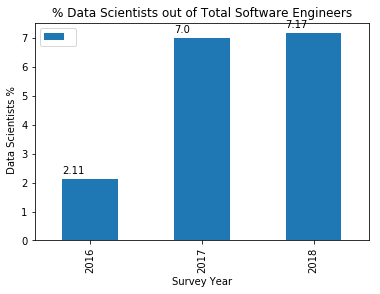

,
2016,2.114938
2017,6.995252
2018,7.170098


In [17]:
ds_list = pd.DataFrame(columns=[''])

for i in survey_data:
    ds_surveys= data_scientists[i].shape[0]
    total_surveys=survey_data[i].shape[0]
    ds_percent=(ds_surveys/total_surveys)*100
    ds_list.loc[i] = [ds_percent]
draw_bar_graph(ds_list,'% Data Scientists out of Total Software Engineers', 'Survey Year', ' Data Scientists %','1')  
ds_list

###### Q2. Gender based data Scientists  population
Check the number of 

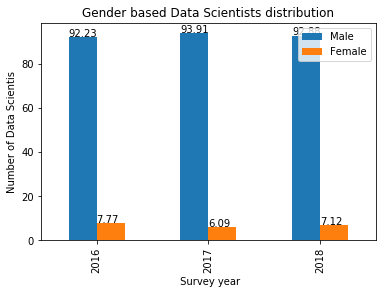

,Male,Female
2016,92.234685,7.765315
2017,93.906958,6.093042
2018,92.883286,7.116714


In [18]:
# Extract data population based on gender. Note: only Male and Female categories are considered for this activity
gender_list={}
gender_list = pd.DataFrame(columns=['Male', 'Female'])
for i in ('2016','2017','2018'):
    total_data_scientists=data_scientists[i]['gender'][data_scientists[i]['gender'].isin(['Male','Female'])==True].count()
    total_male_data_scientists=data_scientists[i]['gender'][data_scientists[i]['gender'].isin(['Male'])==True].count()
    total_female_data_scientists=data_scientists[i]['gender'][data_scientists[i]['gender'].isin(['Female'])==True].count()
    gender_list.loc[i] = [(total_male_data_scientists/total_data_scientists)*100,(total_female_data_scientists/total_data_scientists)*100]

draw_bar_graph(gender_list,'Gender based Data Scientists distribution',' Survey year','Number of Data Scientis' ,'1')  
gender_list

###### Q3. Data Scientists  population around the world

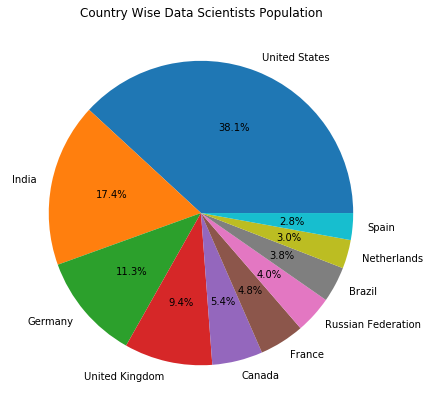

In [19]:
# Script to get country wise data scientists counts
country_survey=data_scientists['2018'].groupby('country').count()['respondent'].rename('' ).astype(int).sort_values(ascending=False).head(10)
country_survey.plot(kind = 'pie', figsize = (10,7),autopct='%1.1f%%', title =  'Country Wise Data Scientists Population')
plt.xticks="" 
plt.show()

###### Q4. Data Scientists  Popular Languages

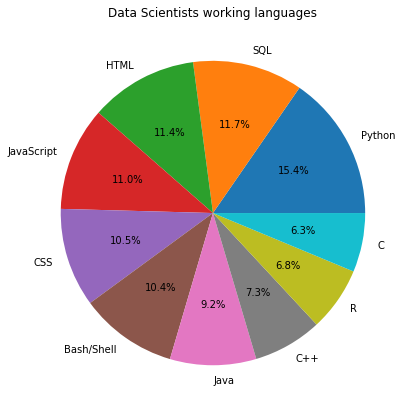

In [20]:
# Scripts to get language names from the semicolon separated list data 

languages=data_scientists['2018']['languageworkedwith'].str.replace(" ", "").str.split(';', expand=True).stack().reset_index(drop=True, level=1).value_counts().rename('').sort_values(ascending=False).head(10)

languages.plot(kind = 'pie', figsize = (10,7),autopct='%1.1f%%', title =  'Data Scientists working languages')
plt.xticks="" 
plt.show()



###### Q5. Data Scientists  job satisfaction

In [21]:
# Each year have different set of options provided for the job satisfaction category. 
# For our analysis all the possible values are mapped to Happy, Unhappy and Neutral
map_jobsatisfaction ={}
map_jobsatisfaction['2018'] = {"Moderately satisfied": "Happy", 
                               "Extremely satisfied": "Happy",
                               "Slightly satisfied": "Happy",
                               "Neither satisfied nor dissatisfied": "Neutral", 
                               "Slightly dissatisfied": "Unhappy",
                               "Moderately dissatisfied": "Unhappy",
                               "Extremely dissatisfied": "Unhappy",
                               np.nan:"Neutral" 
                              }

map_jobsatisfaction['2016'] = { "I love my job" : "Happy",
                               "I don't have a job" : "Neutral",
                               "I'm somewhat satisfied with my job" : "Happy",
                               "I'm somewhat dissatisfied with my job" : "Unhappy",
                               "I'm neither satisfied nor dissatisfied" : "Neutral",
                               "Other (please specify)" : "Neutral",
                               "I hate my job" : "Unhappy", 
                               np.nan:"Neutral"  
                             }

map_jobsatisfaction['2017'] = { 0 : "Unhappy",
                                1 : "Unhappy",
                                2 : "Unhappy",
                                3 : "Unhappy",
                                4 : "Unhappy",
                                5 : "Neutral",
                                6 : "Happy",
                                7 : "Happy",
                                8 : "Happy",
                                9 : "Happy",
                                10 : "Happy",
                                np.nan:"Neutral" 
                            }

In [22]:
# Align data set value with the mapping set
jobsatisfication = {}
jobsatisfication['2018'] = data_scientists['2018'].jobsatisfaction
jobsatisfication['2017'] = data_scientists['2017'].jobsatisfaction
jobsatisfication['2016'] = data_scientists['2016'].jobsatisfaction

jobsatisfication['2016'] = jobsatisfication['2016'].map(map_jobsatisfaction['2016'])
jobsatisfication['2017'] = jobsatisfication['2017'].map(map_jobsatisfaction['2017'])
jobsatisfication['2018'] = jobsatisfication['2018'].map(map_jobsatisfaction['2018'])

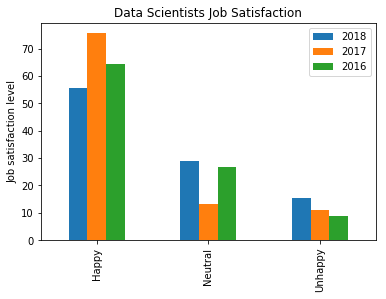

,2018,2017,2016
Happy,55.558691,75.632823,64.472574
Neutral,29.034989,13.324061,26.751055
Unhappy,15.406321,11.043115,8.776371


In [23]:
jobsatisfication_percentage = pd.DataFrame.from_dict({i: (jobsatisfication[i].value_counts()/len(jobsatisfication[i])*100)
                                               for i in jobsatisfication})
draw_bar_graph(jobsatisfication_percentage,'Data Scientists Job Satisfaction','','Job satisfaction level' ,'') 
jobsatisfication_percentage

###### Q6. Age wise data Scientists average salary 


In [24]:
# Clean/drop the data to remove null and 0 salaries
data_scientists_2018= data_scientists['2018'][data_scientists['2018']['convertedsalary']>1200 ]
data_scientists_2018= data_scientists_2018[data_scientists_2018['convertedsalary']<2000000.0 ]
data_scientists_2018['convertedsalary'].max()

1800000.0

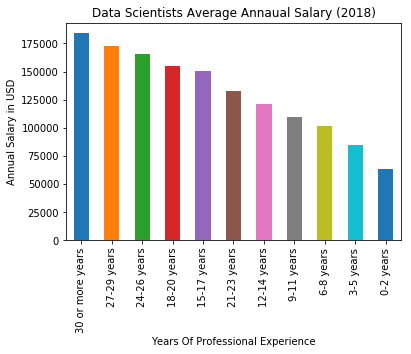

count        11.000000
mean     131000.909091
std       38503.229827
min       63377.000000
25%      105593.500000
50%      132461.000000
75%      160159.500000
max      183988.000000
Name: Annual Salary, dtype: float64

In [25]:
salary_data=data_scientists_2018.groupby('yearscodingprof').mean()['convertedsalary'].rename('Annual Salary' ).astype(int).sort_values(ascending=False)
draw_bar_graph(salary_data,'Data Scientists Average Annaual Salary (2018)','Years Of Professional Experience','Annual Salary in USD' ,'')  
salary_data.describe()

## Result Evaluation 

**Summary of the above analysis:** 
* Data scientist jobs are increasing every year by ~4% 
* Female data scientist jobs are increasing every year by ~1%
* Data scientist jobs are present in almost all the countries. 
But most job opening are in United States, India and United Kingdom.
* Most popular languages among data scientists are Python and SQL
* Data scientists are getting salary from USD 63K to USD 183K per annum and average salary is around ~USD 130K
* 55% of data scientists are satisfied from their job. Enter with caution, job satisfaction from 2017 to 2018 has reduced from 75% to 55%


**Conclusion:** I am onboarding the data scientist role. What about you?
